In [2]:
from scipy import io as sio
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
output_dir = '/Users/siyuangao/Google Drive/Siyuan/manifold_journal/figs/'

##  stationary distribution

In [4]:
p_con = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/rs_brain_state_dynamics_con.mat')
p_schz = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/rs_brain_state_dynamics_schz.mat')

p_con = p_con['all_stationary_p_rs_con']
p_schz = p_schz['all_stationary_p_rs_schz']

In [41]:
p_all = np.concatenate((p_con, p_schz), axis=0)
p_all = np.reshape(p_all.T, (-1, ))

In [164]:
state_type = ['High-cog']*121+['Transition']*121+['Fixation']*121+['Low-cog']*121
subject_type = (['Control']*77 + ['Schz']*44)*4

In [85]:
p_df = pd.DataFrame(data={'prob':p_all, 'state':state_type, 'subject_type':subject_type})

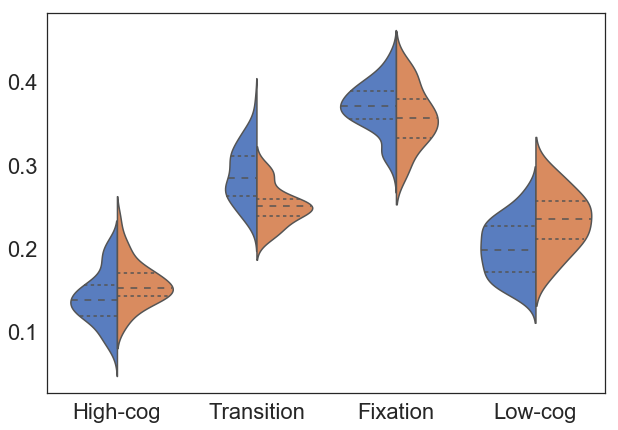

In [150]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="state", y="prob", hue="subject_type", data=p_df, palette="muted", split=True, inner="quartile", ax=ax)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.legend_.remove()
fig.savefig(output_dir+'stationary_probability_ucla.png')

In [142]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

##  entropy

In [156]:
en_con = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/rs_brain_state_dynamics_con.mat')
en_schz = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/rs_brain_state_dynamics_schz.mat')

en_con = en_con['rs_entropy_control']
en_schz = en_schz['rs_entropy_schz']

In [157]:
en_all = np.concatenate((en_con, en_schz), axis=0)
en_all = np.reshape(en_all.T, (-1, ))

In [165]:
en_df = pd.DataFrame(data={'entropy':en_all, 'state':state_type, 'type':subject_type})

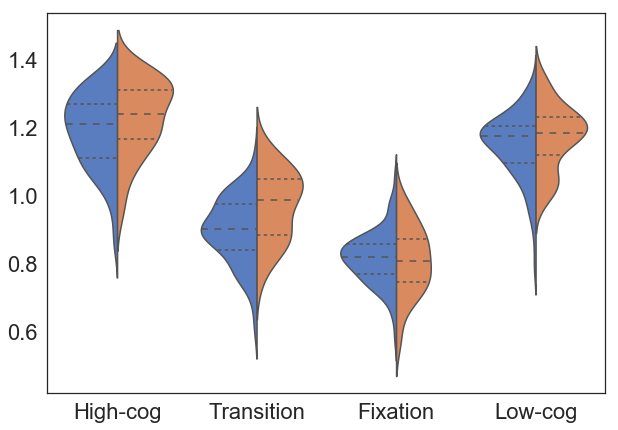

In [167]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="state", y="entropy", hue="type", data=en_df, palette="muted", split=True, inner="quartile", ax=ax)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.legend_.remove()
fig.savefig(output_dir+'entropy_ucla.png')

## Participation coefficient

In [101]:
pc_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/group_participation_coefficient/violin_plots.mat')
pc_global_con = pc_file['pc_global_con'].T
pc_global_schz = pc_file['pc_global_schz'].T
kmeans_idx_con = pc_file['kmeans_idx_con']
kmeans_idx_schz = pc_file['kmeans_idx_schz']

In [162]:
pc_all = np.squeeze(np.concatenate((pc_global_con, pc_global_schz), axis=0))

kmeans_all = np.squeeze(np.concatenate((kmeans_idx_con, kmeans_idx_schz), axis=0))
state_dict = {1:'High-cog', 2:'Transition', 3:'Fixation', 4:'Low-cog'}
brain_state = [state_dict[i] for i in kmeans_all]

subject_type_pc = ['Control']*1005 + ['Schz']*1005

In [163]:
pc_df = pd.DataFrame(data={'pc':pc_all, 'state':brain_state, 'subject_type':subject_type_pc})

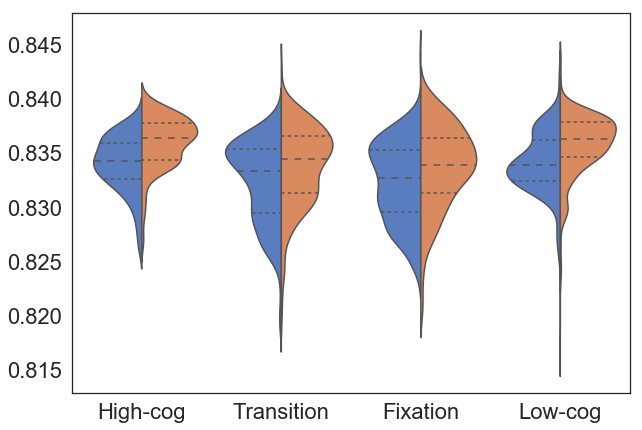

In [140]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="state", y="pc", hue="subject_type", data=pc_df, palette="muted", split=True, inner="quartile", 
               order=['High-cog', 'Transition', 'Fixation', 'Low-cog'], ax=ax)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.legend_.remove()
fig.savefig(output_dir+'pc_ucla.png')

# All sub

## entropy

In [97]:
entropy_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/allsub.mat')
entropy = entropy_file['rs_entropy_all']

In [98]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['adhd', 'bpad', 'control', 'schz']
entropy_df = pd.DataFrame(columns=['entropy', 'state', 'subject_type'])

for i in range(4):
    for j in range(4):
        df_temp = pd.DataFrame(data={'entropy':entropy[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['entropy', 'state', 'subject_type'])
        entropy_df = entropy_df.append(df_temp)

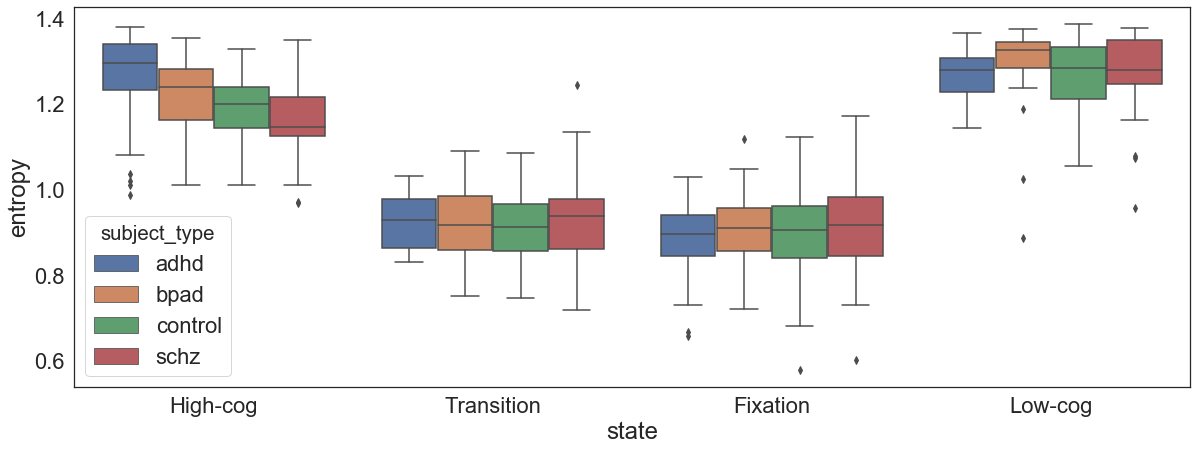

In [99]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='entropy', hue='subject_type', data=entropy_df)

## stationary distribution

In [100]:
distribution_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/allsub.mat')
distribution = distribution_file['all_stationary_p_rs']

In [101]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['adhd', 'bpad', 'control', 'schz']
distribution_df = pd.DataFrame(columns=['distribution', 'state', 'subject_type'])

for i in range(4):
    for j in range(4):
        df_temp = pd.DataFrame(data={'distribution':distribution[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['distribution', 'state', 'subject_type'])
        distribution_df = distribution_df.append(df_temp)

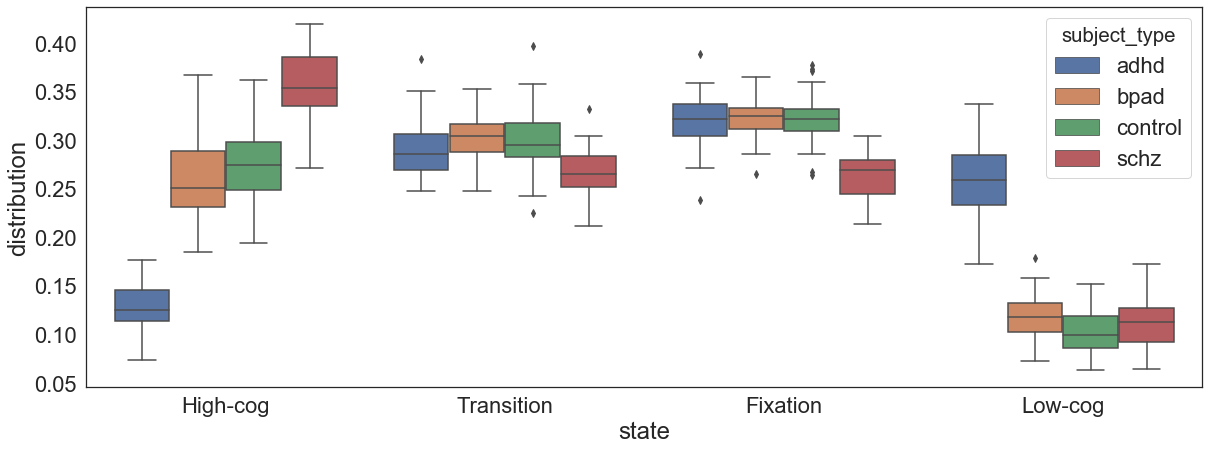

In [102]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='distribution', hue='subject_type', data=distribution_df)

# HCP

## stationary distribution

In [4]:
distribution_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/allsub390_validation.mat')
distribution = distribution_file['all_stationary_p_rs']

In [5]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['female', 'male']
distribution_df = pd.DataFrame(columns=['distribution', 'state', 'subject_type'])

for i in range(2):
    for j in range(4):
        df_temp = pd.DataFrame(data={'distribution':distribution[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['distribution', 'state', 'subject_type'])
        distribution_df = distribution_df.append(df_temp)

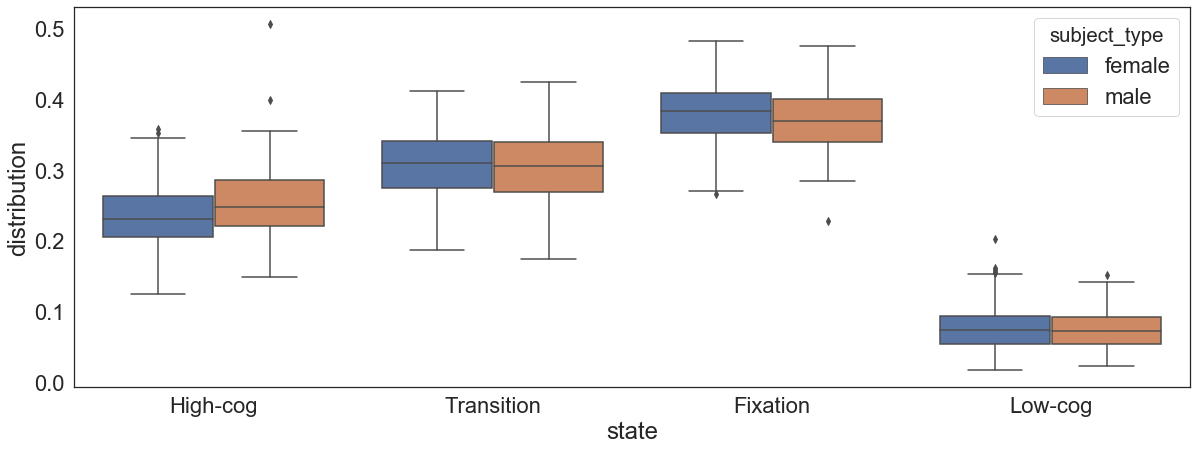

In [6]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='distribution', hue='subject_type', data=distribution_df)

## entropy

In [8]:
entropy_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/allsub390_validation.mat')
entropy = entropy_file['rs_entropy_all']

In [9]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['female', 'male']
entropy_df = pd.DataFrame(columns=['entropy', 'state', 'subject_type'])

for i in range(2):
    for j in range(4):
        df_temp = pd.DataFrame(data={'entropy':entropy[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['entropy', 'state', 'subject_type'])
        entropy_df = entropy_df.append(df_temp)

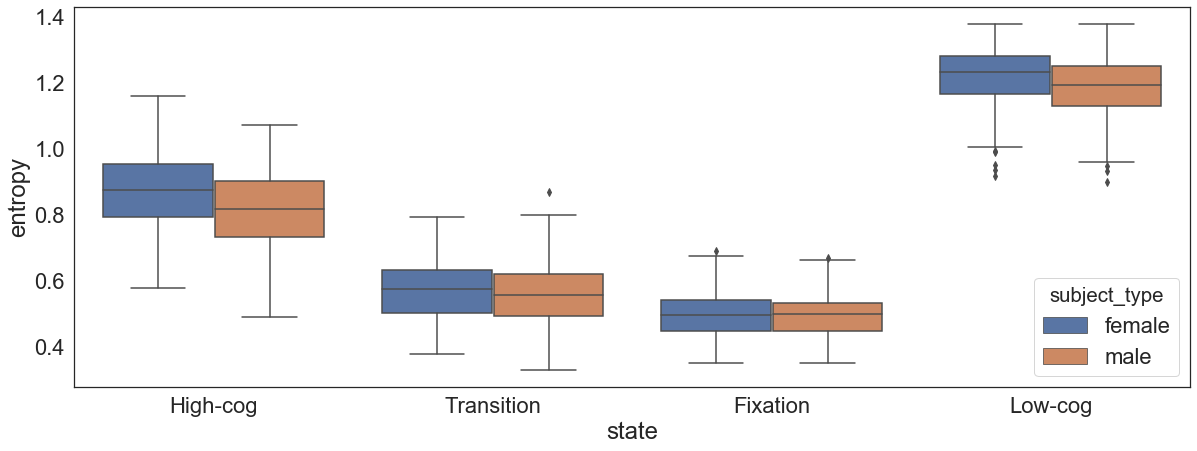

In [10]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='entropy', hue='subject_type', data=entropy_df)

# HCP rand 100

## stationary distribution

In [87]:
distribution_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/allsub_rand100.mat')
distribution = distribution_file['all_stationary_p_rs']

In [93]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['random1', 'random2']
distribution_df = pd.DataFrame(columns=['distribution', 'state', 'subject_type'])

for i in range(2):
    for j in range(4):
        df_temp = pd.DataFrame(data={'distribution':distribution[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['distribution', 'state', 'subject_type'])
        distribution_df = distribution_df.append(df_temp)

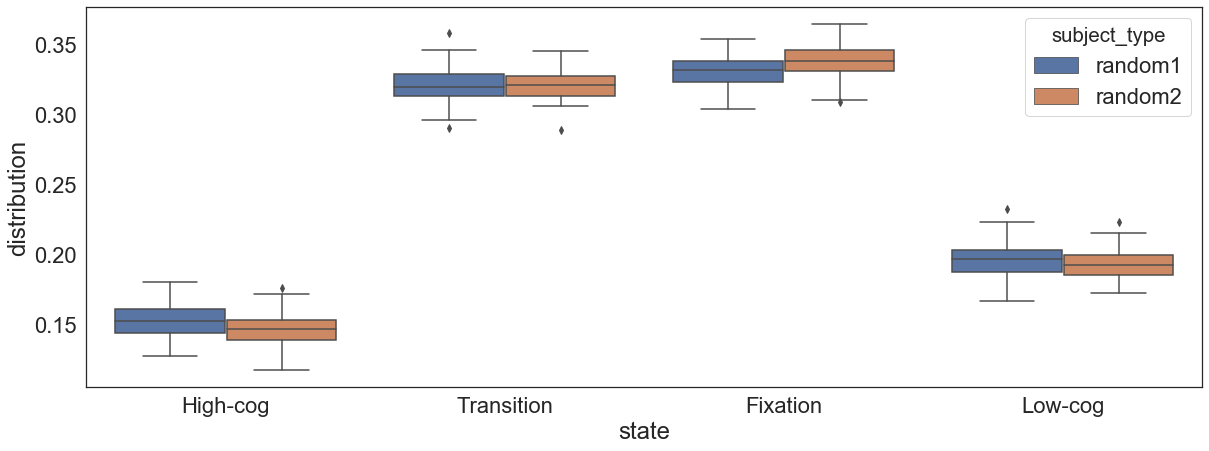

In [94]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='distribution', hue='subject_type', data=distribution_df)

## entropy

In [90]:
entropy_file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/allsub_rand100.mat')
entropy = entropy_file['rs_entropy_all']

In [95]:
state_dict = ['High-cog', 'Transition', 'Fixation', 'Low-cog']
subject_type = ['random1', 'random2']
entropy_df = pd.DataFrame(columns=['entropy', 'state', 'subject_type'])

for i in range(2):
    for j in range(4):
        df_temp = pd.DataFrame(data={'entropy':entropy[i, 0][:, j], 'state':state_dict[j], 'subject_type':subject_type[i]}, 
                              columns=['entropy', 'state', 'subject_type'])
        entropy_df = entropy_df.append(df_temp)

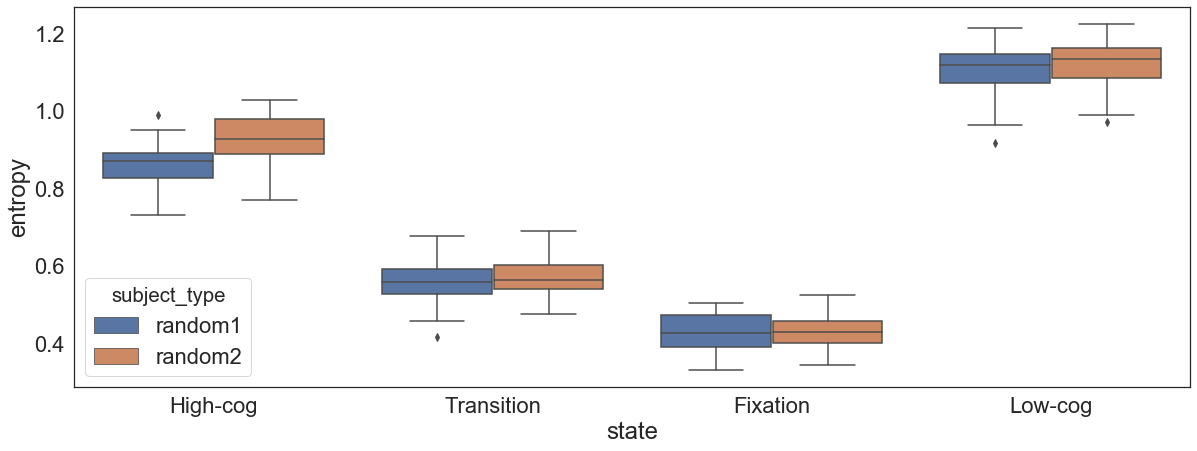

In [96]:
sns.set(font="Verdana", font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x='state', y='entropy', hue='subject_type', data=entropy_df)